In [71]:
import numpy as np
import pandas as pd
import cv2
import glob
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets, neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict


# Data preprocessing

### Load validation images

In [3]:
fruit_images_valid = []
labels_valid = [] 
fruit_dict_valid = {}
fruit_index = []
count = 0
for fruit_dir_path in glob.glob("COGS118b_data/New_Train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    fruit_dict_valid[fruit_label] = count
    fruit_index.append(count)

    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images_valid.append(image)
        labels_valid.append(fruit_label)
        count = count + 1
fruit_images_valid = np.array(fruit_images_valid)
labels_valid = np.array(labels_valid)

In [4]:
print(fruit_images_valid.shape)
print(labels_valid.shape)
print(fruit_dict_valid)


(4819, 45, 45, 3)
(4819,)
{'Apple Red Delicious': 0, 'Cherry 1': 490, 'Strawberry': 982, 'Avocado': 1474, 'Kiwi': 1901, 'Lemon': 2367, 'Mandarine': 2859, 'Lychee': 3349, 'Banana': 3839, 'Pineapple': 4329}


### Load testing images

In [5]:
fruit_images_test = []
labels_test = [] 
fruit_dict_test = {}
count2 = 0
for fruit_dir_path in glob.glob("COGS118b_data/New_Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    fruit_dict_test[fruit_label] = count2
    
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images_test.append(image)
        labels_test.append(fruit_label)
        count2 = count2 + 1
fruit_images_test = np.array(fruit_images_test)
labels_test = np.array(labels_test)

In [6]:
print(fruit_images_test.shape)
print(labels_test.shape)
print(fruit_dict_test)


(1621, 45, 45, 3)
(1621,)
{'Apple Red Delicious': 0, 'Cherry 1': 166, 'Strawberry': 330, 'Avocado': 494, 'Kiwi': 637, 'Lemon': 793, 'Mandarine': 957, 'Lychee': 1123, 'Banana': 1289, 'Pineapple': 1455}


### Load untrained images

In [7]:
fruit_images_unseen = []
labels_unseen = [] 
fruit_dict_unseen = {}
count3 = 0
for fruit_dir_path in glob.glob("COGS118b_data/Unseened_Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    fruit_dict_unseen[fruit_label] = count3
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images_unseen.append(image)
        labels_unseen.append(fruit_label)
        count3 = count3 + 1
fruit_images_unseen = np.array(fruit_images_unseen)
labels_unseen = np.array(labels_unseen)

In [8]:
print(fruit_images_unseen.shape)
print(labels_unseen.shape)
print(fruit_dict_unseen)


(807, 45, 45, 3)
(807,)
{'Plum_not_trained': 0, 'Kaki_not_trained': 151, 'Orange_not_trained': 317, 'Carambula_not_trained': 477, 'Peach_not_trained': 643}


### Define useful functions

In [9]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1  


In [10]:
def draw_confusion_matrix(true_labels, predicted_labels, index, column, title):
    conf_mx = confusion_matrix(true_labels, predicted_labels)
    df_cm = pd.DataFrame(conf_mx, index = index, columns = column)
    plt.figure(figsize = (15,11))
    sns.heatmap(df_cm, annot=True)
    plt.title(title)
    plt.show()

### Plot what the images look like

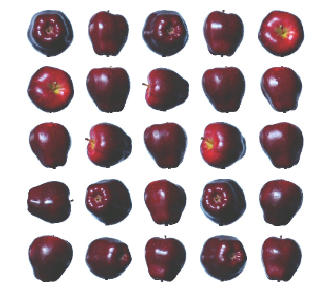

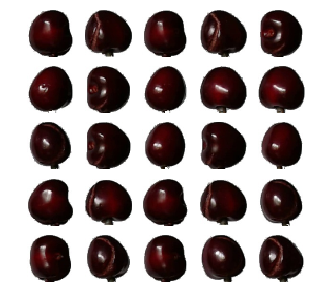

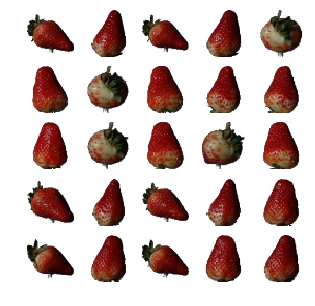

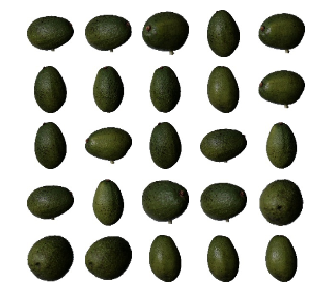

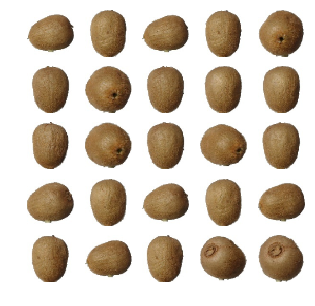

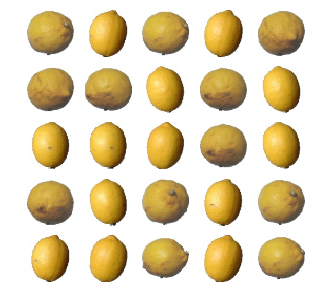

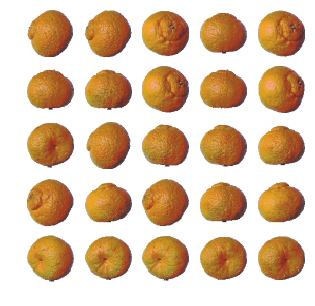

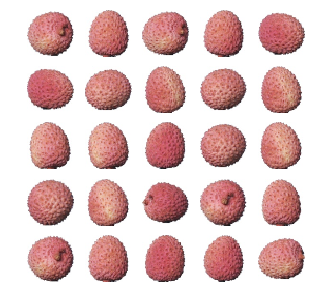

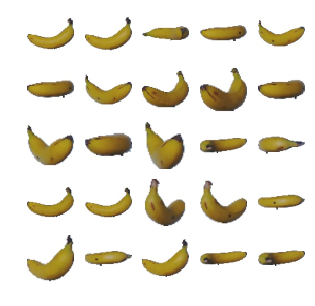

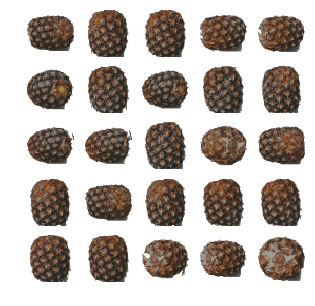

In [11]:

for i in range(10):
    plot_image_grid(fruit_images_valid[fruit_index[i]:fruit_index[i]+25], 5, 5, figsize = (5,5))

### Dimensional reduction using PCA

In [12]:
scaler = StandardScaler()
scaled_image_valid = scaler.fit_transform([i.flatten() for i in fruit_images_valid])
pca = PCA(n_components=100)
transformed_image_valid = pca.fit_transform(scaled_image_valid)
print(transformed_image_valid.shape)


(4819, 100)


### Shuffling data and labels

In [13]:
from sklearn.utils import shuffle

pca_X_train, pca_y_train = shuffle(transformed_image_valid,labels_valid, random_state=42)
X_train, y_train = shuffle(fruit_images_valid,labels_valid, random_state=42)
X_test, y_test = shuffle(fruit_images_test,labels_test, random_state=42)
print(pca_X_train.shape, pca_y_train.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(4819, 100) (4819,)
(4819, 45, 45, 3) (4819,)
(1621, 45, 45, 3) (1621,)


# 3. KNeighbors Classifier


### Cross-validation Score

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors = 30)

print('Accuracy is: ', cross_val_score(knn_clf, pca_X_train, pca_y_train, cv = 5, scoring="accuracy"))

Accuracy is:  [0.99172699 0.99689441 0.98856549 0.98960499 0.99168399]


In [26]:
knn_clf_50 = KNeighborsClassifier(n_neighbors = 50)

print('Accuracy is: ', cross_val_score(knn_clf_50, pca_X_train, pca_y_train, cv = 5, scoring="accuracy"))

Accuracy is:  [0.97724922 0.98757764 0.97297297 0.96985447 0.97297297]


In [28]:
knn_clf_100 = KNeighborsClassifier(n_neighbors = 100)

print('Accuracy is: ', cross_val_score(knn_clf_100, pca_X_train, pca_y_train, cv = 5, scoring="accuracy"))

Accuracy is:  [0.94105481 0.94720497 0.92723493 0.92099792 0.91995842]


### Error Analysis

In [42]:
label_train_pred3 = cross_val_predict(knn_clf, pca_X_train, pca_y_train, cv=5)
label_train_pred4 = cross_val_predict(knn_clf_50, pca_X_train, pca_y_train, cv=5)
label_train_pred5 = cross_val_predict(knn_clf_100, pca_X_train, pca_y_train, cv=5)
draw_confusion_matrix(y_train, label_train_pred3, index, column, 'Confusion matrix')
train_rf_30 = accuracy_score(y_train, label_train_pred3)
train_rf_50 = accuracy_score(y_train, label_train_pred4)
train_rf_100 = accuracy_score(y_train, label_train_pred5)
print("Training accuracy of 30 neighbors:", train_rf_30)
print("Training accuracy of 50 neighbors:", train_rf_50)
print("Training accuracy of 100 neighbors:", train_rf_100)

Training accuracy of 30 neighbors: 0.9916995227225566
Training accuracy of 50 neighbors: 0.97613612782735
Training accuracy of 100 neighbors: 0.9313135505291554


### Evaluate on the Test Set

                     precision    recall  f1-score   support

Apple Red Delicious       0.98      1.00      0.99       166
            Avocado       1.00      0.98      0.99       143
             Banana       1.00      1.00      1.00       166
           Cherry 1       1.00      1.00      1.00       164
               Kiwi       0.85      1.00      0.92       156
              Lemon       0.93      1.00      0.96       164
             Lychee       1.00      1.00      1.00       166
          Mandarine       1.00      0.92      0.96       166
          Pineapple       1.00      1.00      1.00       166
         Strawberry       1.00      0.84      0.91       164

        avg / total       0.98      0.97      0.97      1621

test accuracy: 0.97347316471314


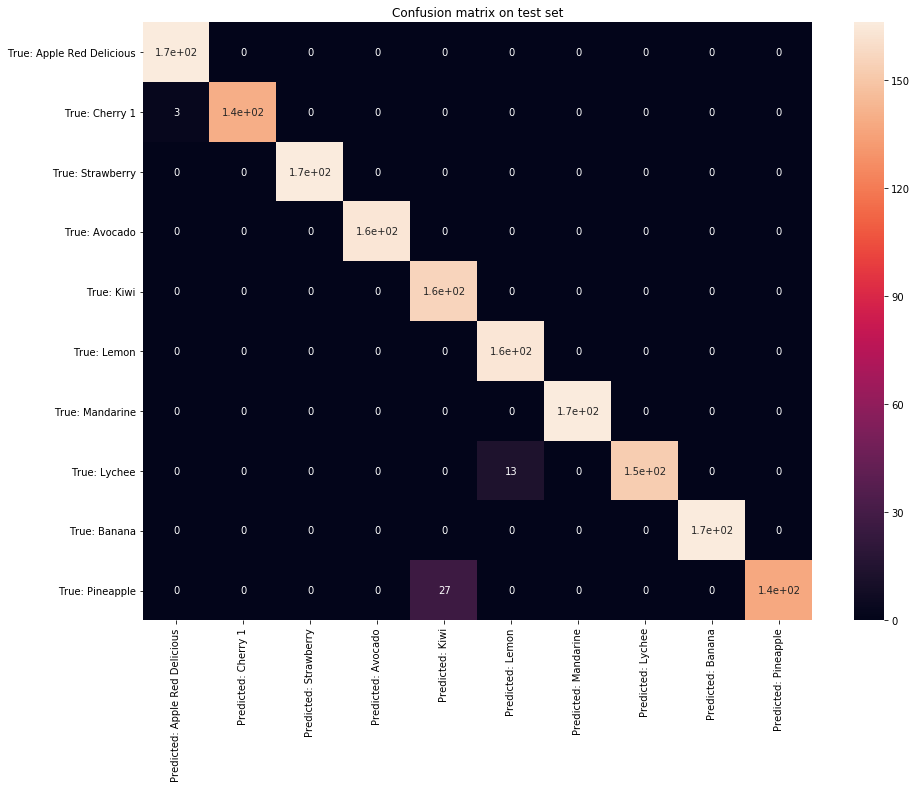

In [34]:
a = []
knn_clf.fit([i.flatten() for i in X_train], y_train)
yhat3 = knn_clf.predict([i.flatten() for i in X_test]) #k = 30
print(classification_report(y_test, yhat3))
print("test accuracy:", accuracy_score(yhat3, y_test))
a.append(accuracy_score(yhat3, y_test))
draw_confusion_matrix(y_test, yhat3, index, column, 'Confusion matrix on test set')

                     precision    recall  f1-score   support

Apple Red Delicious       0.98      1.00      0.99       166
            Avocado       1.00      0.97      0.99       143
             Banana       1.00      0.98      0.99       166
           Cherry 1       1.00      1.00      1.00       164
               Kiwi       0.75      0.98      0.85       156
              Lemon       0.92      1.00      0.96       164
             Lychee       1.00      1.00      1.00       166
          Mandarine       0.98      0.92      0.95       166
          Pineapple       1.00      1.00      1.00       166
         Strawberry       1.00      0.70      0.82       164

        avg / total       0.96      0.96      0.96      1621

test accuracy: 0.9555829734731647


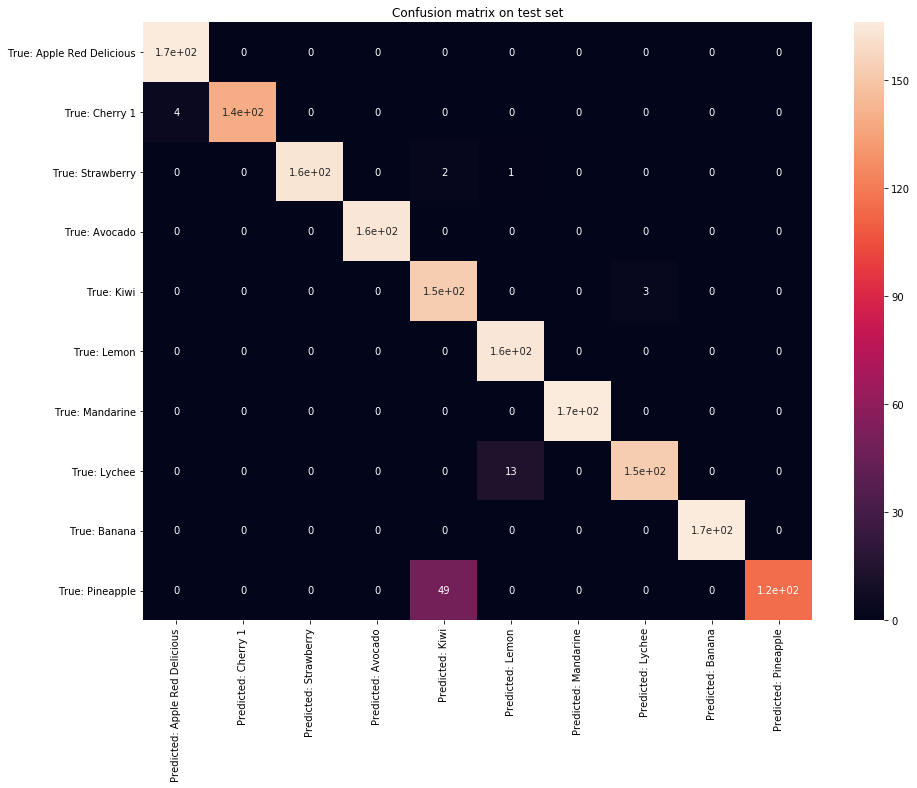

In [35]:
knn_clf_50.fit([i.flatten() for i in X_train], y_train)
yhat3 = knn_clf_50.predict([i.flatten() for i in X_test]) #k = 50
print(classification_report(y_test, yhat3))
print("test accuracy:", accuracy_score(yhat3, y_test))
draw_confusion_matrix(y_test, yhat3, index, column, 'Confusion matrix on test set')
a.append(accuracy_score(yhat3, y_test))

                     precision    recall  f1-score   support

Apple Red Delicious       0.96      0.88      0.92       166
            Avocado       1.00      0.92      0.96       143
             Banana       1.00      0.62      0.77       166
           Cherry 1       0.96      1.00      0.98       164
               Kiwi       0.60      0.74      0.66       156
              Lemon       0.89      1.00      0.94       164
             Lychee       0.78      1.00      0.88       166
          Mandarine       0.79      0.92      0.85       166
          Pineapple       0.89      1.00      0.94       166
         Strawberry       1.00      0.59      0.74       164

        avg / total       0.89      0.87      0.86      1621

test accuracy: 0.8661320172732881


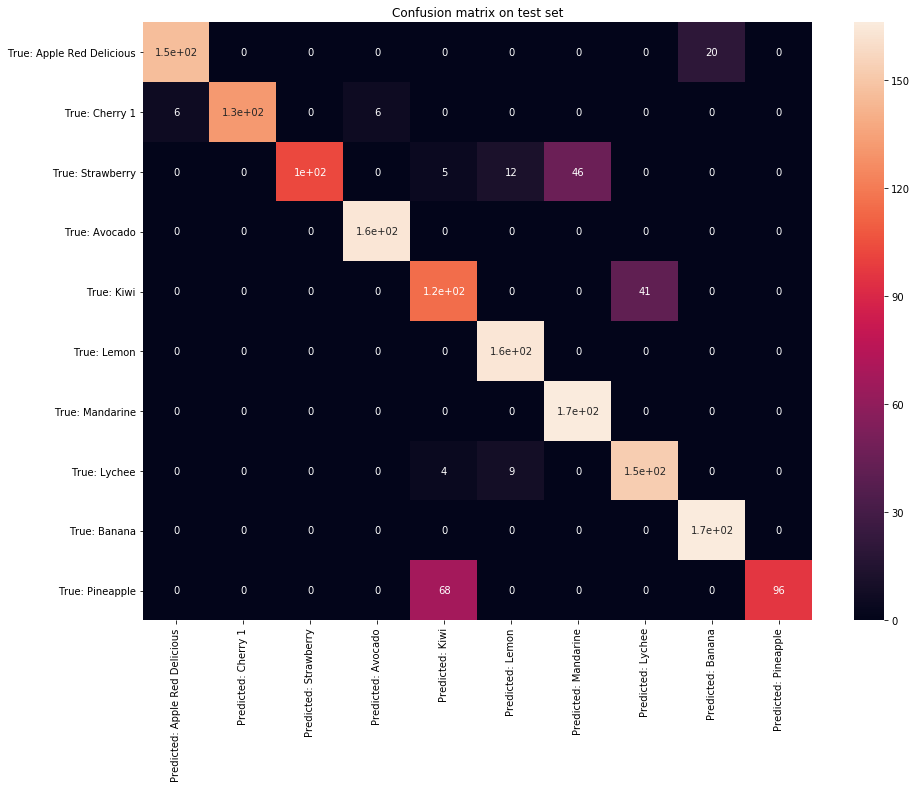

[0.97347316471314, 0.9555829734731647, 0.8661320172732881]


In [36]:
knn_clf_100.fit([i.flatten() for i in X_train], y_train)
yhat3 = knn_clf_100.predict([i.flatten() for i in X_test]) #k = 100
print(classification_report(y_test, yhat3))
print("test accuracy:", accuracy_score(yhat3, y_test))
draw_confusion_matrix(y_test, yhat3, index, column, 'Confusion matrix on test set')
a.append(accuracy_score(yhat3, y_test))
print(a)

In [53]:
df_accuracy = pd.DataFrame([[train_rf_30,train_rf_50,train_rf_100],[a[0],a[1],a[2]]], 
                           columns=['30','50','100'], 
                           index=['training accuracy','testing accuracy'])
df_accuracy

,30,50,100
training accuracy,0.991700,0.976136,0.931314
testing accuracy,0.973473,0.955583,0.866132


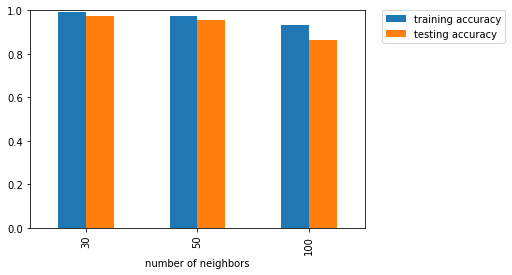

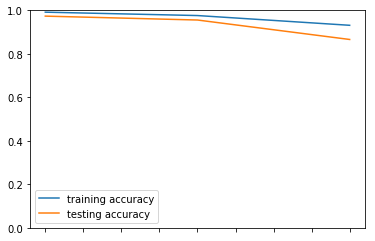

In [69]:
df_accuracy2=df_accuracy.transpose()
plt = df_accuracy2.plot(kind='bar',ylim=[0,1.0])
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.set_xlabel('number of neighbors')
plt = df_accuracy2.plot.line(ylim=[0,1.0])


{0: 'Apple Red Delicious', 1: 'Avocado', 2: 'Banana', 3: 'Cherry 1', 4: 'Kiwi', 5: 'Lemon', 6: 'Lychee', 7: 'Mandarine', 8: 'Pineapple', 9: 'Strawberry'}
[8 9 4 ... 7 6 3]


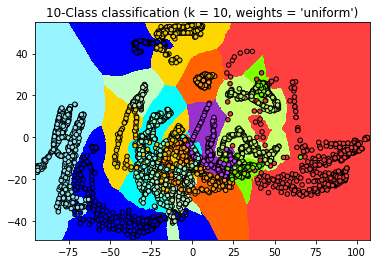

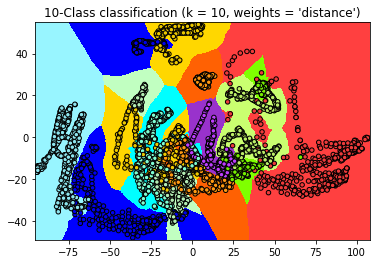

In [77]:
X = pca_X_train[:,:2]

n_neighbors = 10
label_to_id_dict = {v:i for i,v in enumerate(np.unique(pca_y_train))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
print(id_to_label_dict)
label_ids = np.array([label_to_id_dict[x] for x in pca_y_train])
print(label_ids)
y = label_ids

h = .02  # step size in the mesh


cmap_light = ListedColormap(['#00FFFF', '#0000FF', '#FF4040','#98F5FF', '#FF6103','#7FFF00', '#CAFF70', '#9932CC', '#C1FFC1', '#FFD700'])
cmap_bold = ListedColormap(['#7FFFD4', '#0000EE', '#EE3B3B', '#8EE5EE', '#FF9912', '#76EE00', '#BCEE68', '#BF3EFF', '#B4EEB4', '#EEC900'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("10-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()